In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.preprocessing import LabelEncoder
from statsmodels.tsa.stattools import adfuller
import pmdarima as pm
from statsmodels.tsa.arima.model import ARIMA

In [25]:
ww_covid = pd.read_csv('/Users/omkarsadekar/Documents/NEU Study Material/NEU Study Material/Healthcare Data and Applications/Project Datasets/Cleaned_data/merged_wastewater_covid_data.csv')

In [26]:
ww_covid.head(5)

,Tester,Site type,Name of Sampling Location,7 day average of SARS-CoV-2 concentration,Number of samples in the last 7 days,SARS-CoV-2 Detected,Sample collection date,Units (measuring concentration),City of sampling location,State of sampling location,...,County,Population,Cases during this week_y,Cumulative confirmed cases,Cumulative tests,Tests during the week,Positive tests the week,Week percent positivity,Weekly case rate,Weekly testing rate
0,BioBot,Municipal,Fall River WWTP,2.075420e+05,4,Detected,2023-09-20,copies/L,Fall River,MA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BioBot,Municipal,Fall River WWTP,4.780398e+05,3,Detected,2024-01-23,copies/L,Fall River,MA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BioBot,Municipal,Brockton/ Abington,3.515109e+05,4,Detected,2023-08-08,copies/L,Brockton,MA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BioBot,Municipal,SESD-Peabody/Salem Pump,9.580250e+05,4,Detected,2023-11-22,copies/L,Salem,MA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BioBot,Municipal,Athol WWTP,1.959966e+06,3,Detected,2024-01-19,copies/L,Athol,MA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
ww_covid.isnull().sum()

Tester                                          0
Site type                                       0
Name of Sampling Location                       0
7 day average of SARS-CoV-2 concentration       0
Number of samples in the last 7 days            0
SARS-CoV-2 Detected                             0
Sample collection date                          0
Units (measuring concentration)                 0
City of sampling location                       0
State of sampling location                      0
County of sampling location                     0
Date data last updated                          0
Week Start Date                              3199
Week End Date                                3199
Group                                        3199
Subgroup                                     3199
Estimated population                         3199
Percent of the population                    3199
Week case rate                               3199
Cumulative cases                             3199


In [28]:
#Dropping NA values for weekly data starting from July 2023
ww_covid = ww_covid.dropna()

In [29]:
#Sorting Dataframe in ascending order
df = ww_covid.sort_values(by='Week Start Date', ascending=True)

In [30]:
df.head(20)

,Tester,Site type,Name of Sampling Location,7 day average of SARS-CoV-2 concentration,Number of samples in the last 7 days,SARS-CoV-2 Detected,Sample collection date,Units (measuring concentration),City of sampling location,State of sampling location,...,County,Population,Cases during this week_y,Cumulative confirmed cases,Cumulative tests,Tests during the week,Positive tests the week,Week percent positivity,Weekly case rate,Weekly testing rate
1482,BioBot,Municipal,MWRA Northern,246372.196767,3,Detected,2023-07-08,copies/L,Winthrop,MA,...,Suffolk,797935.9991,62.0,62.0,1451.0,1451.0,64.0,0.044108,7.770047,181.844158
401,BioBot,Municipal,MWRA Southern,193437.946600,3,Detected,2023-07-08,copies/L,Winthrop,MA,...,Suffolk,797935.9991,62.0,62.0,1451.0,1451.0,64.0,0.044108,7.770047,181.844158
402,BioBot,Municipal,MWRA Southern,193437.946600,3,Detected,2023-07-08,copies/L,Winthrop,MA,...,Suffolk,797935.9991,62.0,62.0,1451.0,1451.0,64.0,0.044108,7.770047,181.844158
403,BioBot,Municipal,MWRA Southern,193437.946600,3,Detected,2023-07-08,copies/L,Winthrop,MA,...,Suffolk,797935.9991,62.0,62.0,1451.0,1451.0,64.0,0.044108,7.770047,181.844158
404,BioBot,Municipal,MWRA Southern,193437.946600,3,Detected,2023-07-08,copies/L,Winthrop,MA,...,Suffolk,797935.9991,62.0,62.0,1451.0,1451.0,64.0,0.044108,7.770047,181.844158
405,BioBot,Municipal,MWRA Southern,193437.946600,3,Detected,2023-07-08,copies/L,Winthrop,MA,...,Suffolk,797935.9991,62.0,62.0,1451.0,1451.0,64.0,0.044108,7.770047,181.844158
406,BioBot,Municipal,MWRA Southern,193437.946600,3,Detected,2023-07-08,copies/L,Winthrop,MA,...,Suffolk,797935.9991,62.0,62.0,1451.0,1451.0,64.0,0.044108,7.770047,181.844158
407,BioBot,Municipal,MWRA Southern,193437.946600,3,Detected,2023-07-08,copies/L,Winthrop,MA,...,Suffolk,797935.9991,62.0,62.0,1451.0,1451.0,64.0,0.044108,7.770047,181.844158
400,BioBot,Municipal,MWRA Southern,193437.946600,3,Detected,2023-07-08,copies/L,Winthrop,MA,...,Suffolk,797935.9991,62.0,62.0,1451.0,1451.0,64.0,0.044108,7.770047,181.844158
408,BioBot,Municipal,MWRA Southern,193437.946600,3,Detected,2023-07-08,copies/L,Winthrop,MA,...,Suffolk,797935.9991,62.0,62.0,1451.0,1451.0,64.0,0.044108,7.770047,181.844158


In [31]:
#Save the df as csv
#df.to_csv('/Users/omkarsadekar/Documents/NEU Study Material/NEU Study Material/Healthcare Data and Applications/Project Datasets/Cleaned_data/final_data.csv', index=False)

In [32]:
df.columns

Index(['Tester', 'Site type', 'Name of Sampling Location',
       '7 day average of SARS-CoV-2 concentration',
       'Number of samples in the last 7 days', 'SARS-CoV-2 Detected',
       'Sample collection date', 'Units (measuring concentration)',
       'City of sampling location', 'State of sampling location',
       'County of sampling location', 'Date data last updated',
       'Week Start Date', 'Week End Date', 'Group', 'Subgroup',
       'Estimated population', 'Percent of the population', 'Week case rate',
       'Cumulative cases', 'Cumulative case rate', 'Deaths during this week',
       'Week death rate', 'Cumulative deaths', 'Cumulative death rate',
       'Confirmed deaths', 'Confirmed cases', 'County', 'Population',
       'Cases during this week_y', 'Cumulative confirmed cases',
       'Cumulative tests', 'Tests during the week', 'Positive tests the week',
       'Week percent positivity', 'Weekly case rate', 'Weekly testing rate'],
      dtype='object')

In [33]:
#Dropping Features not required
df.drop(['Tester', 'Site type','Name of Sampling Location','Units (measuring concentration)','State of sampling location',
               'County of sampling location','Date data last updated','Group'], axis=1, inplace=True)

In [34]:
df['Subgroup'].value_counts()

Subgroup
80+ years                                            139
Asian, not Hispanic                                  139
Unknown age                                          139
Male                                                 139
50-64 years                                          139
35-49 years                                          139
20-34 years                                          139
5-19 years                                           139
<5 years                                             139
Unknown sex                                          139
Transgender                                          139
Female                                               139
Hispanic, all races                                  139
Unknown race                                         139
White, not Hispanic                                  139
Native Hawaiian or Pacific Islander, not Hispanic    139
Other race, not Hispanic                             139
Alaskan Native or Amer

In [35]:
# Mapping dictionary for 'Subgroup' column
subgroup_map = {
    '80+ years': 0,
    'Asian, not Hispanic': 1,
    'Unknown age': 2,
    'Male': 3,
    '50-64 years': 4,
    '35-49 years': 5,
    '20-34 years': 6,
    '5-19 years': 7,
    '<5 years': 8,
    'Unknown sex': 9,
    'Transgender': 10,
    'Female': 11,
    'Hispanic, all races': 12,
    'Unknown race': 13,
    'White, not Hispanic': 14,
    'Native Hawaiian or Pacific Islander, not Hispanic': 15,
    'Other race, not Hispanic': 16,
    'Alaskan Native or American Indian, not Hispanic': 17,
    'Black or African-American, not Hispanic': 18,
    '65-79 years': 19
}

# Replace subgroup names with numerical values
df['Subgroup'] = df['Subgroup'].map(subgroup_map)


In [36]:
#Unique Value Counts in County
df['County'].value_counts()

County
Suffolk    1400
Hampden     700
Essex       660
Bristol      20
Name: count, dtype: int64

In [37]:
#Mapping for County
county_map = {
    'Suffolk': 0,
    'Hampden': 1,
    'Essex': 2, 
    'Bristol': 3
}
df['County'] = df['County'].map(county_map)

In [39]:
#Dropping Unwanted Features
df.drop(['SARS-CoV-2 Detected','Week Start Date','Week End Date','Cumulative cases', 'Cumulative deaths', 'Cumulative case rate', 'Cumulative death rate',
                'Confirmed deaths', 'Confirmed cases','County','Cumulative confirmed cases','Cumulative tests', 
                'Week percent positivity','Sample collection date','Deaths during this week', 'Positive tests the week', 'Weekly case rate','Tests during the week',
                'Weekly testing rate','Percent of the population','Week case rate', 'Week death rate'], axis=1, inplace=True)

In [40]:


# Replace values 1-4 with 2 in the 'Cases during this week' column
df['Cases during this week_y'] = df['Cases during this week_y'].replace(["1-4"], 2)
# Convert 'Cases during this week' column to float
df['Cases during this week_y'] = df['Cases during this week_y'].astype(float)

In [41]:
df['City of sampling location'].value_counts()

City of sampling location
Winthrop    1400
Chicopee     700
Salem        660
Norton        20
Name: count, dtype: int64

In [42]:
#Mapping for City
city_map = {
    'Winthrop': 0,
    'Chicopee': 1,
    'Salem': 2, 
    'Norton': 3
}
df['City of sampling location'] = df['City of sampling location'].map(city_map)

In [43]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# Assuming your data is stored in a DataFrame named 'data'
# Splitting data into features (X) and target variable (y)
X = df.drop(columns=['Cases during this week_y'])
y = df['Cases during this week_y']

# Train the Random Forest Regressor model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X, y)

# Get feature importances
feature_importances = rf_regressor.feature_importances_

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display feature importances
print(importance_df)


                                     Feature  Importance
0  7 day average of SARS-CoV-2 concentration    0.923533
1       Number of samples in the last 7 days    0.034694
5                                 Population    0.021496
2                  City of sampling location    0.020248
4                       Estimated population    0.000015
3                                   Subgroup    0.000015


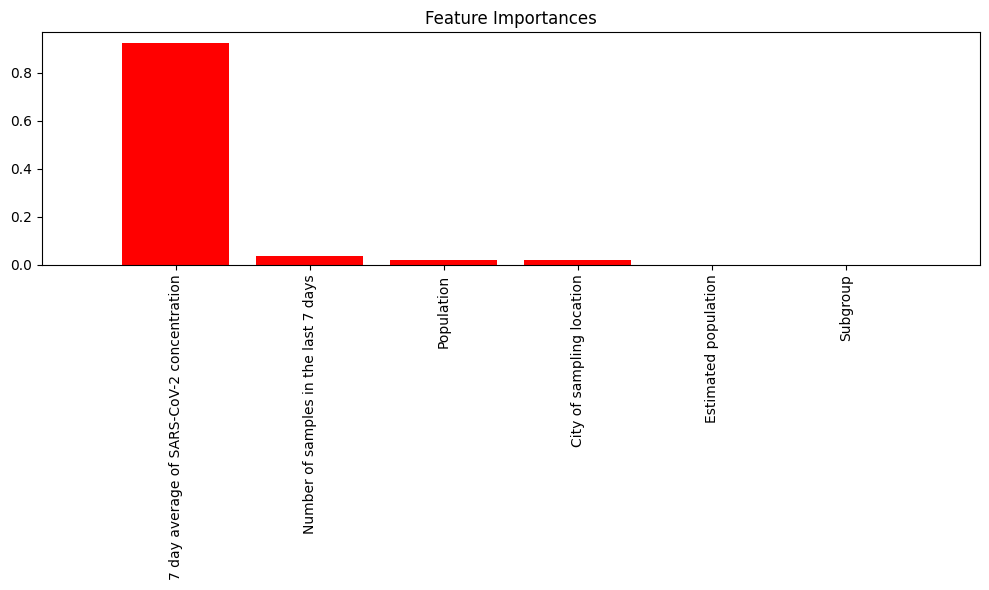

In [51]:
# Get feature importances
feature_importances = rf_regressor.feature_importances_

# Get column names
columns = X.columns

# Sort feature importances in descending order
indices = np.argsort(feature_importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), feature_importances[indices],
        color="r", align="center")
plt.xticks(range(X.shape[1]), [columns[i] for i in indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.tight_layout()
plt.show()


In [166]:
df.dropna(inplace=True)

In [44]:
from sklearn.model_selection import train_test_split
X = df.drop(['Cases during this week_y'],axis=1) # Selecting independent features
y = df[['Cases during this week_y']] # Selecting target variable
# Creating training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size = .3, # 30% of data for testing
                                                   shuffle = True, # Shuffling values
                                                   random_state = 42)

In [45]:
# Adding a Constant term for the Intercept
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

In [46]:
X_train

,const,7 day average of SARS-CoV-2 concentration,Number of samples in the last 7 days,City of sampling location,Subgroup,Estimated population,Population
3752,1.0,8.218836e+05,7,0,19,8.993657e+05,797935.9991
5089,1.0,1.070071e+06,4,1,13,0.000000e+00,465824.9991
706,1.0,3.844072e+05,7,0,4,1.444570e+06,797935.9991
1077,1.0,6.404336e+05,4,2,12,8.789442e+05,809829.0011
3674,1.0,3.621923e+06,4,2,19,8.993657e+05,809829.0011
...,...,...,...,...,...,...,...
4162,1.0,6.079785e+05,7,0,15,1.841119e+03,797935.9991
1015,1.0,7.139449e+05,7,0,16,0.000000e+00,797935.9991
4208,1.0,4.753955e+05,7,0,0,3.016979e+05,797935.9991
3158,1.0,6.395317e+05,4,1,16,0.000000e+00,465824.9991


In [47]:
# Fitting model
model = sm.OLS(y_train, X_train).fit()
print(model.summary(alpha = 0.05))

                               OLS Regression Results                               
Dep. Variable:     Cases during this week_y   R-squared:                       0.711
Model:                                  OLS   Adj. R-squared:                  0.710
Method:                       Least Squares   F-statistic:                     796.0
Date:                      Sun, 31 Mar 2024   Prob (F-statistic):               0.00
Time:                              15:35:36   Log-Likelihood:                -10864.
No. Observations:                      1946   AIC:                         2.174e+04
Df Residuals:                          1939   BIC:                         2.178e+04
Df Model:                                 6                                         
Covariance Type:                  nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [48]:
predictions = model.predict(X_test)
# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Print MSE and RMSE
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error (MSE): 3985.39760351304
Root Mean Squared Error (RMSE): 63.13000557193892


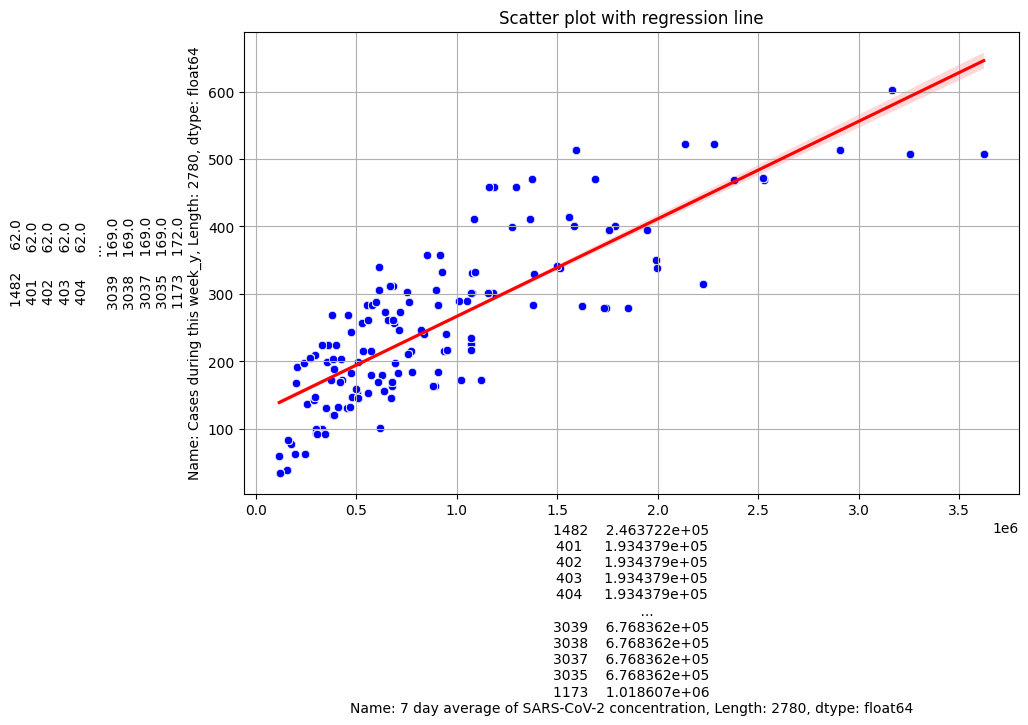

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

x_variable = df['7 day average of SARS-CoV-2 concentration']
y_variable = df['Cases during this week_y']

# Creating the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=x_variable, y=y_variable, data=df, color='blue')

# Adding the regression line
sns.regplot(x=x_variable, y=y_variable, data=df, scatter=False, color='red')

# Adding labels and title
plt.xlabel(x_variable)
plt.ylabel(y_variable)
plt.title('Scatter plot with regression line')

# Showing plot
plt.grid(True)
plt.show()

